# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [33]:
data = pd.read_csv('Categorical.csv')
data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


Remove the duplicate index column from the dataset. 

In [34]:

data = data.reset_index(drop=True)
data


,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


## Map the data

Use the <i>'continent'</i> category for this analysis.

In [35]:
data['continent'] = data['continent'].map({'Africa':0, 'Asia':1, 'Europe':2, 'North America':3,'South America':4, 'Australia':5, 'Oceania':6, 'Seven seas (open ocean)':7})

data.dropna(inplace=True)

data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,3.0
1,Afghanistan,66.004734,33.835231,1.0
2,Angola,17.537368,-12.293361,0.0
3,Anguilla,-63.064989,18.223959,3.0
4,Albania,20.049834,41.142450,2.0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,6.0
237,Yemen,47.586762,15.909280,1.0
238,South Africa,25.083901,-29.000341,0.0
239,Zambia,27.774759,-13.458242,0.0


## Select the features

In [48]:
x = data.iloc[:,1:4]
x

,Longitude,Latitude,continent
0,-69.982677,12.520880,3.0
1,66.004734,33.835231,1.0
2,17.537368,-12.293361,0.0
3,-63.064989,18.223959,3.0
4,20.049834,41.142450,2.0
...,...,...,...
236,-172.164851,-13.753243,6.0
237,47.586762,15.909280,1.0
238,25.083901,-29.000341,0.0
239,27.774759,-13.458242,0.0


## Clustering

Use 4 clusters initially.

In [49]:
kmeans = KMeans(7)
kmeans.fit(x)

C:\Users\Goodness\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Goodness\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=7)

## Clustering results

In [50]:
ident_clusters = kmeans.fit_predict(x)
ident_clusters

C:\Users\Goodness\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Goodness\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 5, 4, 3, 0, 0, 0, 4, 3, 0, 1, 2, 4, 3, 2, 0, 0, 4, 0, 6, 6, 5,
       0, 4, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 5, 5, 4, 4, 0, 3, 5, 6, 6, 4,
       6, 1, 3, 4, 6, 3, 3, 3, 3, 0, 0, 0, 0, 4, 3, 0, 3, 6, 3, 0, 4, 0,
       0, 4, 0, 2, 3, 0, 0, 2, 6, 0, 0, 0, 6, 6, 6, 6, 6, 0, 3, 0, 3, 2,
       3, 5, 4, 3, 0, 3, 0, 5, 0, 5, 5, 4, 0, 4, 0, 0, 0, 0, 3, 0, 0, 5,
       5, 5, 4, 5, 5, 3, 3, 5, 0, 4, 5, 0, 6, 0, 3, 0, 5, 4, 0, 0, 0, 5,
       3, 6, 0, 0, 4, 5, 3, 2, 0, 6, 0, 5, 0, 5, 2, 4, 6, 3, 4, 4, 5, 4,
       2, 6, 2, 6, 3, 1, 0, 0, 5, 2, 2, 4, 5, 3, 1, 3, 5, 2, 2, 0, 3, 5,
       0, 3, 0, 1, 4, 0, 5, 4, 6, 4, 4, 4, 6, 5, 6, 6, 2, 6, 3, 0, 4, 4,
       3, 0, 6, 3, 0, 0, 0, 4, 3, 4, 0, 3, 6, 6, 5, 5, 5, 2, 1, 3, 0, 0,
       5, 4, 4, 0, 3, 3, 5, 0, 3, 3, 3, 3, 5, 2, 1, 1, 4, 4, 4, 4])

In [51]:
data_clusters = data.copy()
data_clusters['Clusters'] = ident_clusters
data_clusters

,name,Longitude,Latitude,continent,Clusters
0,Aruba,-69.982677,12.520880,3.0,3
1,Afghanistan,66.004734,33.835231,1.0,5
2,Angola,17.537368,-12.293361,0.0,4
3,Anguilla,-63.064989,18.223959,3.0,3
4,Albania,20.049834,41.142450,2.0,0
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,6.0,1
237,Yemen,47.586762,15.909280,1.0,4
238,South Africa,25.083901,-29.000341,0.0,4
239,Zambia,27.774759,-13.458242,0.0,4


## Plot the data

<function matplotlib.pyplot.show(close=None, block=None)>

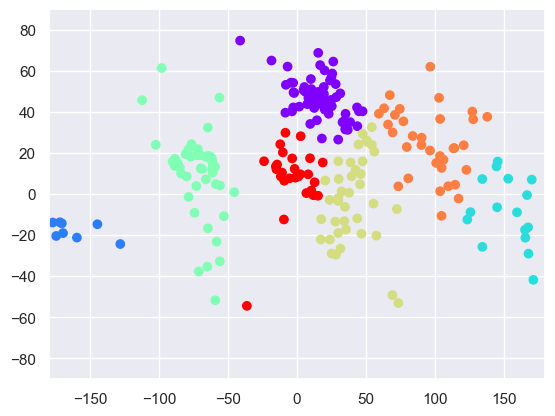

In [52]:
plt.scatter(data_clusters['Longitude'], data_clusters['Latitude'], c= data_clusters['Clusters'], cmap= 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.